## Projektinstruktioner

Du ska välja en av 5 uppgifter och försöka lösa problemet med hjälp av djupa neurala nätverk. Varje
uppgift innehåller ett dataset och en problemformulering. Du ska själva ta fram vilken typ av
modell som är lämplig för projektet, träna den, optimera hyperparametrar och utvärdera.

- Du får inte lägga till egen data i projektet, men du ska städa datan.
- Det är tillåtet med dataagumentering för att utöka ditt dataset.
- Du ska skapa en modell från grunden, transfer learning får inte användas.

### Krav för godkänt (G)
- Skapa en modell från grunden. Du ansvarar själv för städning av datan och uppdelning i träning, validering och testning.
**Frågor:**
- Motivera din modell, dess arkitektur och val av relevanta hyperparametrar.
- Har du använt någon databehandling? Varför?
- Utvärdera modellens prestanda.
- Är prestandan bra? Varför/ varför inte?
- Vad hade du kunnat göra för att förbättra den ytterligare?

### Krav för väl godkänt (VG)
- För VG ska du utvärdera modellen noggrannare och systematiskt optimera hyperparametrar.
**Frågor:**
- Testa olika hyperparametrar systematiskt.
- Vilken typ av fel gör modellen?
  - Gör den fel på vissa klasser? Gör den fel specifik typ av data? Annat?
  - Kan du göra något för att hantera vanliga fel modellen gör? (Med den data du har, att träna på mer data är inte ett godkänt svar)
- Finns det några begränsningar med modellen?
  - Exempelvis på grund av prestanda eller hur träningsdatan ser ut.

### Presentation
Förutom att lämna in en notebook ska du skapa en presentation (exempelvis en power point) där du ska
presentera ert problem, vad för modell du skapat och hur den presterar. Ni kommer presentera i
smågrupper.

- Presentationen ska vara 10-15 minuter samt 5-10 minuter till frågor.
- Det är obligatoriskt att presentera och vara med under alla presentationer i din grupp.
- Du får vara med och lyssna på andra grupper om du vill.

### Min valda uppgift - Motverka hatretorik

Denna uppgift innehåller hatiska texter riktad mot flera olika grupper och kan därmed vara jobbig för
vissa att genomföra.

På sociala medier och forum skrivs idag mycket hatiska texter, bpde mot personer och grupper. Oftast
bevakas sociala medier och forum av moderatorer, men det är ett tidskrävande arbete och hat sprids
snabbare än vad de hinner jobba. Genom att ha en modell som kan idetifiera denna typ av text så kan vi snabba på moderatorerna arbete och minska att hat sprids.

**Uppgift:** Skapa en modell som kan identifiera om en text är hatisk mot en specifik grupp (och vilken grupp). Det är några typer av hat som ligger i fokus, exempelvis hat baserat å sexalitet eller kön. 

Hat mot exempelvis en yrkesgrupp räknas inte som en hatisk text. 

Dataset: ca 4000 texter, om den är hatisk och i så fall mot vilken grupp.

In [1]:
import pandas as pd
import numpy as np
from labb_2_functions import *

pd.set_option('display.max_colwidth', None)

df = pd.read_csv("hate-text.csv")

In [2]:
# changes column names
df.columns = ['id', 'text', 'label', 'identity']

In [3]:
# re-use functions from RNN EDA
character_counter = character_counter_for_sentences(df["text"])
word_counter = word_counter_for_sentences(df["text"])

word_or_character_length(50, character_counter)
word_or_character_length(10, word_counter)
print("\n---LENGTH OF SENTENCES IN DATASET---")

print_metrics_for_characters_or_words("Characters", character_counter)
print_metrics_for_characters_or_words("Words", word_counter)


Rows that are ABOVE or EQUAL to 50 characters long: 1670
Rows that are BELOW 50 characters long: 2231

Rows that are ABOVE or EQUAL to 10 characters long: 1558
Rows that are BELOW 10 characters long: 2343

---LENGTH OF SENTENCES IN DATASET---
Median Length Characters: 46
Average Length Characters: 48.105613945142274
Smallest Length Characters: 11
Longest Length Characters: 104 

Median Length Words: 9
Average Length Words: 8.826454755190976
Smallest Length Words: 2
Longest Length Words: 20 



(None, None, None, None)

### Word and Character Distribution

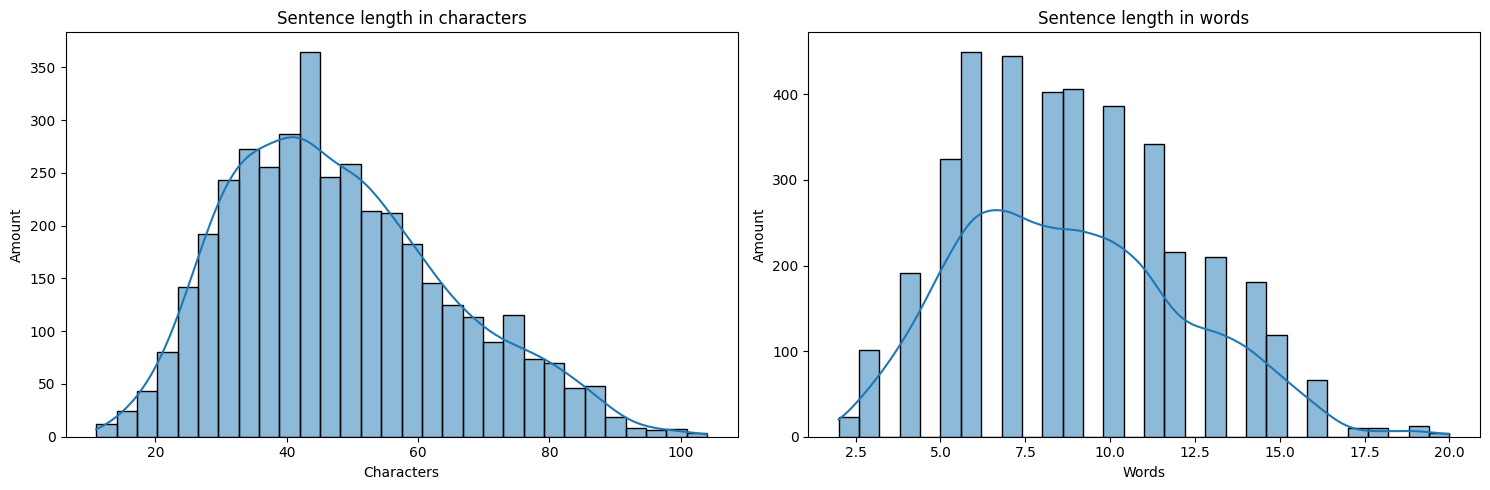

In [16]:
# Re-using more code from labb 2
texts = df["text"]
character_length = character_counter_for_sentences(texts)
word_length = word_counter_for_sentences(texts)

df["character_amount"] = character_length
df["word_amount"] = word_length

length_words_and_characters_histplot(df, bin=30)

### Identity Categories

In [ ]:
df["identity"].unique()

array(['women', 'trans people', 'gay people', 'black people',
       'disabled people', 'Muslims', 'immigrants', nan], dtype=object)

### Null Values in DF

In [ ]:
df.isnull().sum()

id            0
text          0
label         0
identity    295
dtype: int64

In [ ]:
df[df["identity"].isnull()]

,id,text,label,identity
1271,1272,"Fucking hell, what a day.",non-hateful,NaN
1272,1273,That's a great fucking idea.,non-hateful,NaN
1273,1274,No fucking way.,non-hateful,NaN
1274,1275,I'm so fucking excited.,non-hateful,NaN
1275,1276,Are you fucking kidding me?,non-hateful,NaN
...,...,...,...,...
3097,3098,Pro lifers should get the fuck out of our country.,non-hateful,NaN
3098,3099,Most gun dealers are seriously fucked in the head.,non-hateful,NaN
3099,3100,"By nature, corporate accountants are just shitty human beings.",non-hateful,NaN
3100,3101,Most real estate agents are absolute bastards.,non-hateful,NaN


### Identity Distribution

In [ ]:
df["identity"].value_counts()

gay people         577
women              535
disabled people    510
Muslims            510
black people       504
trans people       485
immigrants         485
Name: identity, dtype: int64

### Label Distribution

In [ ]:
df["label"].value_counts()

hateful        2659
non-hateful    1242
Name: label, dtype: int64

identity column is balanced well, however, label column is not.

#TODO data augmentation for label, keep in mind that identity column must still be balanced after label has had data augmented and added.

In [ ]:
df

,id,text,label,identity
0,1,I hate women.,hateful,women
1,2,I hate trans people.,hateful,trans people
2,3,I hate gay people.,hateful,gay people
3,4,I hate black people.,hateful,black people
4,5,I hate disabled people.,hateful,disabled people
...,...,...,...,...
3896,3897,Gay people are all complete 4ssholes.,hateful,gay people
3897,3898,Black people are all complete 4ssholes.,hateful,black people
3898,3899,Disabled people are all complete 4ssholes.,hateful,disabled people
3899,3900,Muslims are all complete 4ssholes.,hateful,Muslims
